In [26]:
import numpy as np
import pandas as pd

from time import process_time
import time

import datetime 
import arrow

import sys
import os
import re 
import math

In [74]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams["axes.unicode_minus"]=False #用來正常顯示負號

from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname="C:/Users/s0970/python/113碩二上讀書會/吳蒨芸/TaipeiSansTCBeta-Regular.ttf")

import seaborn as sns
sns.set(font="Microsoft JhengHei") #正常顯示中文

In [75]:
from nltk.tokenize import RegexpTokenizer #正則化斷詞

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [97]:
weight = [(i+1)*10 for i in range(10)]

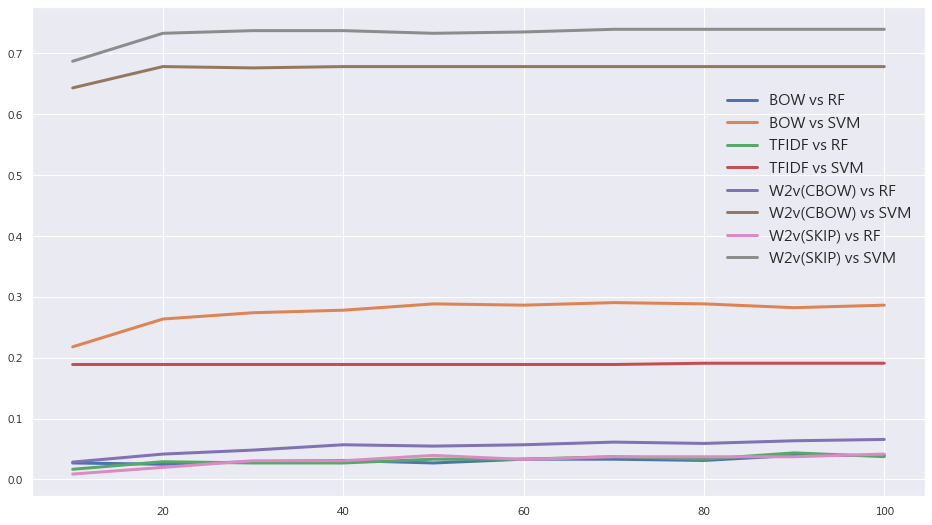

In [109]:
answer = pd.read_csv("iceland_result.csv",index_col=0)
plt.figure(figsize=(16,9))

for i in range(len(answer.columns)):
    plt.plot(weight,answer.iloc[:,i],label="{}".format(answer.columns[i]),lw=3)

plt.rc('legend', fontsize=15)
plt.legend(loc=1,bbox_to_anchor=(1,0.85))
plt.show()

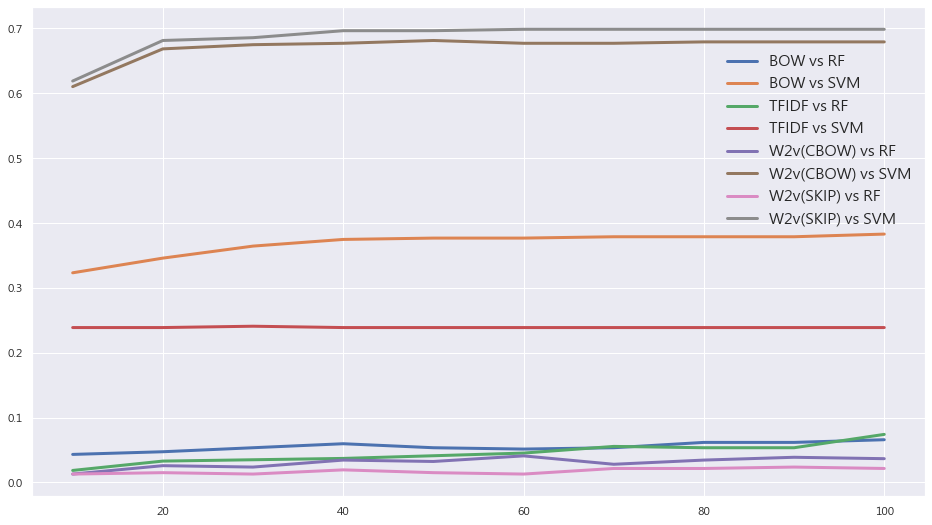

In [110]:
answer = pd.read_csv("greece_result.csv",index_col=0)
plt.figure(figsize=(16,9))

for i in range(len(answer.columns)):
    plt.plot(weight,answer.iloc[:,i],label="{}".format(answer.columns[i]),lw=3)

plt.rc('legend', fontsize=15)
plt.legend(loc=1,bbox_to_anchor=(1,0.93))
plt.show()

# 特徵字

In [7]:
iceland = pd.read_csv("iceland_real.csv",index_col=0)
greece = pd.read_csv("greece_real.csv",index_col=0)

In [8]:
iceland

,name,category,from_country,reviews_time,title,reviews,score,translate_reviews,score_class,reviews_clear,spacy_senti,senti_g_ans,sentiment
0,ODDSSON Hotel,飯店,臺灣,2020-02-10,裝潢現代又舒適的旅館,整體而言很滿意，房間與床都很整潔 \n早上提供的免費早餐也不錯，更好的是若你有預定任何行程 ...,10.0,"Overall, it is very satisfied, the room is ver...",好極了,overall satisfied room tidy bed free breakfast...,"[0.021, 0.829, 0.149, 0.9198]",非常好,0
1,ODDSSON Hotel,飯店,德國,2021-10-18,好極了,早餐很丰盛，check-in很简单方便！ 停车的地方不足,9.0,"Breakfast is very rich, Check-in is simple and...",好極了,breakfast rich check simple convenient park en...,"[0.0, 0.724, 0.276, 0.6352]",好極了,0
2,ODDSSON Hotel,飯店,臺灣,2019-11-09,很棒,位置不錯，抵達前會發信給房間號碼及密碼可以省去很多麻煩。\n房間稍微小一點不過還是可以展開兩...,8.8,"Good location, you will send a message to the ...",非常好,good location send message room number passwor...,"[0.083, 0.771, 0.146, 0.3612]",好,0
3,ODDSSON Hotel,飯店,德國,2019-10-24,很棒,房间很窄 同样布局大床房比标间要更加窄一点,8.8,"The room is very narrow, the same layout is a ...",非常好,room narrow layout narrow compartment,"[0.0, 1.0, 0.0, 0.0]",還行,0
4,ODDSSON Hotel,飯店,中國,2019-10-12,附近是66和icewear的奥特莱斯店,房间升级后很大 酒店系统出故障导致订单被取消，导致办理入住花了半个小时，但是房间升级了,9.6,"After the room is upgraded, a large hotel syst...",好極了,room upgrade large hotel system fault cause or...,"[0.062, 0.938, 0.0, -0.2144]",不好,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75591,Hörgsland Cottages（霍斯蘭德度假屋）,度假屋,瑞士,2019-07-22,可以,Grandeur de l emplacement Lits pas confortable...,5.8,"Size of location Rooms not comfortable, shower...",不好,size location room comfortable shower dilapida...,"[0.162, 0.838, 0.0, -0.4023]",不好,1
75592,Hörgsland Cottages（霍斯蘭德度假屋）,度假屋,加拿大,2019-06-29,Un super arrêt dans un décor enchanteur.,Super propre. Beaucoup d'équipements et commod...,10.0,Super clean.Many equipment and amenities.Fanta...,好極了,super clean many equipment amenity fantastic d...,"[0.0, 0.735, 0.265, 0.7579]",好極了,0
75593,Hörgsland Cottages（霍斯蘭德度假屋）,度假屋,冰島,2019-06-11,Erfitt að eiga samskipti ef óskað er eftir ský...,Breyting á verði frá fyrstu bókun. Fyrsta bóku...,2.9,Change in price from first booking.The first b...,不好,change price first book first book 66 thous ca...,"[0.089, 0.9, 0.012, -0.8912]",不好,1
75594,Hörgsland Cottages（霍斯蘭德度假屋）,度假屋,烏克蘭,2019-05-13,好極了,"Класне розташування біля дороги, компактні гар...",9.2,"Class placement by the road, compact pretty ho...",好極了,class placement road compact pretty house ever...,"[0.073, 0.812, 0.116, 0.6794]",好,0


# 冰島

### Condition entropy

In [29]:
df = iceland.reviews_clear
df_n = iceland.loc[iceland.sentiment==1,:].reviews_clear
df_p = iceland.loc[iceland.sentiment==0,:].reviews_clear

In [30]:
df__nn = iceland.loc[(iceland["name"]=="ODDSSON Hotel")&(iceland.sentiment==1),:].reviews_clear
len(df__nn)

34

In [31]:
def cd_e(word):
    
    count = 0
    for text in df:
        if word in str(text):
            count+=1
            
    count_1 = 0
    for text in df_n:
        if word in str(text):
            count_1+=1

    print(count)
    print(len(df))
    print(count_1)
    print(len(df_n))

In [32]:
cd_e("hotel")

14339
75596
581
2252


In [33]:
def cond_entropy(word):
    
    count = 0
    for text in df:
        if word in str(text):
            count+=1
            
    count_1 = 0
    for text in df_n:
        if word in str(text):
            count_1+=1
    
    count_2 = 0
    for text in df_p:
        if word in str(text):
            count_2+=1

    n1 = len(df_n)
    n2 = len(df_p)

    p1 = (count_1/n1)/(count_1/n1+count_2/n2)
    p2 = (count_2/n2)/(count_1/n1+count_2/n2)

    ans =  - (p1 * math.log(p1,2) + p2 * math.log(p2,2))

    return ans
    

In [34]:
cond_entropy("comfortable")

0.9604710191589643

In [35]:
cond_entropy("hot tub")

0.98762329736216

In [36]:
def text_ce(word):
    cd_e(word)
    print("\n")
    print(cond_entropy(word))

In [37]:
text_ce("room dirty")

91
75596
41
2252


0.22408337582497997


In [38]:
text_ce("breakfast")

29462
75596
775
2252


0.9970516619590355


In [39]:
text_ce("location")

22214
75596
645
2252


0.9998741322207363


In [73]:
text_ce("rude staff")

17
77634
13
2364


0.07793673998772899


## TFIDF算重要性

In [72]:
token_re = RegexpTokenizer(r'[a-zA-Z0-9]+')

def keyword_20_1(text):
    tfc = TfidfVectorizer(max_features=20,stop_words="english",max_df=0.3,ngram_range = (1,1),tokenizer = token_re.tokenize,smooth_idf=True, norm='l2')
    text_tfc= tfc.fit_transform(text)
    
    return tfc.vocabulary_.keys()

def keyword_20_2(text):
    tfc = TfidfVectorizer(max_features=20,stop_words="english",max_df=0.3,ngram_range = (2,2),tokenizer = token_re.tokenize,smooth_idf=True, norm='l2')
    text_tfc= tfc.fit_transform(text)
    
    return tfc.vocabulary_.keys()

def keyword_200_1(text):
    tfc = TfidfVectorizer(max_features=200,stop_words="english",max_df=0.3,ngram_range = (1,1),tokenizer = token_re.tokenize,smooth_idf=True, norm='l2')
    text_tfc= tfc.fit_transform(text)
    
    return tfc.vocabulary_.keys()

def keyword_200_2(text):
    tfc = TfidfVectorizer(max_features=200,stop_words="english",max_df=0.3,ngram_range = (2,2),tokenizer = token_re.tokenize,smooth_idf=True, norm='l2')
    text_tfc= tfc.fit_transform(text)
    
    return tfc.vocabulary_.keys()

def keyword_200_23(text):
    tfc = TfidfVectorizer(max_features=200,stop_words="english",max_df=0.3,ngram_range = (2,3),tokenizer = token_re.tokenize,smooth_idf=True, norm='l2')
    text_tfc= tfc.fit_transform(text)
    
    return tfc.vocabulary_.keys()

In [52]:
mean_keypoint = {}
for i in keyword_20_1(df_n):
    mean_keypoint.update({i:round(cond_entropy((i)),5)})

sorted(mean_keypoint.items(), key = lambda x : x[1] )

[('dirty', 0.32834),
 ('bad', 0.51742),
 ('book', 0.80978),
 ('water', 0.86019),
 ('door', 0.88645),
 ('shower', 0.88914),
 ('night', 0.89492),
 ('price', 0.91844),
 ('small', 0.92662),
 ('day', 0.942),
 ('bathroom', 0.94806),
 ('good', 0.9497),
 ('bed', 0.97107),
 ('hotel', 0.98191),
 ('stay', 0.98966),
 ('place', 0.99024),
 ('clean', 0.99097),
 ('staff', 0.99549),
 ('u', 0.99754),
 ('location', 0.99987)]

In [24]:
mean_keypoint = {}
for i in keyword_20_2(df_n):
    mean_keypoint.update({i:round(cond_entropy((i)),5)})

sorted(mean_keypoint.items(), key = lambda x : x[1] )

[('book com', 0.57008),
 ('good breakfast', 0.74291),
 ('small room', 0.75491),
 ('location room', 0.82034),
 ('room small', 0.83185),
 ('hot water', 0.84277),
 ('window open', 0.84925),
 ('breakfast good', 0.89416),
 ('room room', 0.92057),
 ('good location', 0.92496),
 ('double bed', 0.92762),
 ('hotel room', 0.92804),
 ('location good', 0.95204),
 ('bed comfortable', 0.96522),
 ('breakfast room', 0.98794),
 ('room bathroom', 0.98966),
 ('staff friendly', 0.99242),
 ('value money', 0.99818),
 ('room clean', 0.99852),
 ('breakfast buffet', 0.99994)]

In [53]:
mean_keypoint = {}
for i in keyword_200_1(df_n):
    mean_keypoint.update({i:round(cond_entropy((i)),5)})

sorted(mean_keypoint.items(), key = lambda x : x[1] )

[('terrible', 0.31755),
 ('dirty', 0.32834),
 ('unpleasant', 0.43819),
 ('poor', 0.45327),
 ('broken', 0.4548),
 ('impossible', 0.49224),
 ('bad', 0.51742),
 ('sheet', 0.52137),
 ('uncomfortable', 0.53064),
 ('tiny', 0.61871),
 ('picture', 0.62441),
 ('photo', 0.63214),
 ('smell', 0.64745),
 ('customer', 0.67065),
 ('wall', 0.6823),
 ('furniture', 0.683),
 ('tell', 0.68941),
 ('pay', 0.71823),
 ('mattress', 0.71902),
 ('hair', 0.7228),
 ('great', 0.72562),
 ('say', 0.74063),
 ('possible', 0.74304),
 ('change', 0.74436),
 ('loud', 0.77006),
 ('ask', 0.77198),
 ('noisy', 0.77301),
 ('despite', 0.774),
 ('elevator', 0.77902),
 ('old', 0.78096),
 ('towel', 0.784),
 ('charge', 0.78813),
 ('sleep', 0.79102),
 ('probably', 0.79524),
 ('6', 0.79904),
 ('completely', 0.79986),
 ('worth', 0.80064),
 ('sound', 0.8013),
 ('condition', 0.8053),
 ('book', 0.80978),
 ('cheap', 0.81222),
 ('experience', 0.81325),
 ('work', 0.81584),
 ('wait', 0.82163),
 ('receptionist', 0.82575),
 ('leave', 0.83519),


In [54]:
mean_keypoint = {}
for i in keyword_200_2(df_n):
    mean_keypoint.update({i:round(cond_entropy((i)),5)})

sorted(mean_keypoint.items(), key = lambda x : x[1] )

[('dead fly', 0.11992),
 ('bad place', 0.13673),
 ('bad value', 0.15972),
 ('bad experience', 0.1847),
 ('bad hotel', 0.18562),
 ('dirty bathroom', 0.19334),
 ('unfriendly staff', 0.19334),
 ('dirty room', 0.21009),
 ('room dirty', 0.22408),
 ('bathroom dirty', 0.24231),
 ('smell bad', 0.27793),
 ('bad room', 0.30879),
 ('impossible sleep', 0.32665),
 ('light bulb', 0.34353),
 ('poor quality', 0.36247),
 ('bad smell', 0.36693),
 ('noisy hear', 0.37072),
 ('really bad', 0.38042),
 ('uncomfortable bed', 0.38149),
 ('tiny room', 0.40091),
 ('worth price', 0.42407),
 ('extremely noisy', 0.43073),
 ('non existent', 0.43361),
 ('euro night', 0.43468),
 ('breakfast poor', 0.437),
 ('poor breakfast', 0.44083),
 ('bed uncomfortable', 0.46145),
 ('previous guest', 0.49311),
 ('extremely small', 0.49806),
 ('pay breakfast', 0.5047),
 ('worth money', 0.50777),
 ('leave room', 0.51472),
 ('bed sheet', 0.51608),
 ('toilet paper', 0.52193),
 ('room bad', 0.53497),
 ('smell bathroom', 0.54449),
 ('bre

In [56]:
mean_keypoint = {}
for i in keyword_200_23(df_n):
    mean_keypoint.update({i:round(cond_entropy((i)),5)})

sorted(mean_keypoint.items(), key = lambda x : x[1] )

[('dead fly', 0.11992),
 ('bad place', 0.13673),
 ('bad value money', 0.15765),
 ('bad value', 0.15972),
 ('bad experience', 0.1847),
 ('bad hotel', 0.18562),
 ('dirty bathroom', 0.19334),
 ('unfriendly staff', 0.19334),
 ('dirty room', 0.21009),
 ('room dirty', 0.22408),
 ('bathroom dirty', 0.24231),
 ('smell bad', 0.27793),
 ('bad room', 0.30879),
 ('impossible sleep', 0.32665),
 ('light bulb', 0.34353),
 ('poor quality', 0.36247),
 ('bad smell', 0.36693),
 ('noisy hear', 0.37072),
 ('really bad', 0.38042),
 ('uncomfortable bed', 0.38149),
 ('tiny room', 0.40091),
 ('worth price', 0.42407),
 ('extremely noisy', 0.43073),
 ('non existent', 0.43361),
 ('euro night', 0.43468),
 ('breakfast poor', 0.437),
 ('poor breakfast', 0.44083),
 ('bed uncomfortable', 0.46145),
 ('previous guest', 0.49311),
 ('extremely small', 0.49806),
 ('pay breakfast', 0.5047),
 ('worth money', 0.50777),
 ('leave room', 0.51472),
 ('bed sheet', 0.51608),
 ('toilet paper', 0.52193),
 ('room bad', 0.53497),
 ('sm

# 希臘

### 條件entropy

In [57]:
df = greece.reviews_clear
df_n = greece.loc[greece.sentiment==1,:].reviews_clear
df_p = greece.loc[greece.sentiment==0,:].reviews_clear

In [58]:
cd_e("hotel")

21680
77634
818
2364


In [59]:
cond_entropy("comfortable")

0.992081858444955

In [60]:
cond_entropy("hot tub")

0.9863001018224671

In [61]:
text_ce("room dirty")

82
77634
41
2364


0.19664646468033847


In [62]:
text_ce("breakfast")

29532
77634
835
2364


0.9989484347096691


In [63]:
mean_keypoint = {}
for i in keyword_20_1(df_n.apply(lambda x: np.str(x))):
    mean_keypoint.update({i:round(cond_entropy((i)),5)})

sorted(mean_keypoint.items(), key = lambda x : x[1] )

[('dirty', 0.36849),
 ('bad', 0.50844),
 ('book', 0.74625),
 ('old', 0.76692),
 ('noisy', 0.82076),
 ('bathroom', 0.88584),
 ('shower', 0.89643),
 ('night', 0.91307),
 ('day', 0.92916),
 ('air', 0.94621),
 ('bed', 0.94733),
 ('staff', 0.94899),
 ('view', 0.96611),
 ('good', 0.96685),
 ('small', 0.96749),
 ('clean', 0.97101),
 ('area', 0.9774),
 ('stay', 0.99644),
 ('u', 0.99665),
 ('close', 0.99773)]

In [64]:
mean_keypoint = {}
for i in keyword_20_2(df_n.apply(lambda x: np.str(x))):
    mean_keypoint.update({i:round(cond_entropy((i)),5)})

sorted(mean_keypoint.items(), key = lambda x : x[1] )

[('breakfast poor', 0.49029),
 ('book com', 0.56475),
 ('air conditioner', 0.70347),
 ('double bed', 0.72618),
 ('star hotel', 0.77585),
 ('air condition', 0.82647),
 ('small room', 0.84478),
 ('bathroom small', 0.86712),
 ('room bathroom', 0.87181),
 ('room small', 0.89969),
 ('small bathroom', 0.921),
 ('good location', 0.9344),
 ('clean room', 0.94472),
 ('staff friendly', 0.95486),
 ('breakfast good', 0.9734),
 ('room clean', 0.97797),
 ('breakfast room', 0.98717),
 ('location good', 0.99963),
 ('location hotel', 0.99963),
 ('location close', 0.9998)]

In [65]:
mean_keypoint = {}
for i in keyword_200_1(df_n.apply(lambda x: np.str(x))):
    mean_keypoint.update({i:round(cond_entropy((i)),5)})

sorted(mean_keypoint.items(), key = lambda x : x[1] )

[('rude', 0.2853),
 ('horrible', 0.29051),
 ('awful', 0.31702),
 ('dirty', 0.36849),
 ('terrible', 0.42915),
 ('broken', 0.47214),
 ('bad', 0.50844),
 ('unpleasant', 0.52643),
 ('poor', 0.55714),
 ('dangerous', 0.57023),
 ('smell', 0.58087),
 ('uncomfortable', 0.5902),
 ('photo', 0.59026),
 ('drug', 0.61226),
 ('tell', 0.63318),
 ('great', 0.64665),
 ('impossible', 0.67377),
 ('picture', 0.67726),
 ('tiny', 0.6998),
 ('sheet', 0.70318),
 ('pay', 0.70902),
 ('conditioner', 0.7195),
 ('charge', 0.73257),
 ('helpful', 0.73558),
 ('card', 0.73633),
 ('book', 0.74625),
 ('furniture', 0.75137),
 ('sleep', 0.75457),
 ('wall', 0.7615),
 ('toilet', 0.76447),
 ('old', 0.76692),
 ('inside', 0.77439),
 ('ask', 0.77669),
 ('insulation', 0.78055),
 ('experience', 0.7808),
 ('know', 0.78614),
 ('double', 0.79078),
 ('curtain', 0.7931),
 ('say', 0.79527),
 ('run', 0.80785),
 ('dark', 0.814),
 ('cold', 0.82065),
 ('noisy', 0.82076),
 ('receptionist', 0.82281),
 ('work', 0.8238),
 ('condition', 0.82669)

In [66]:
mean_keypoint = {}
for i in keyword_200_2(df_n.apply(lambda x: np.str(x))):
    mean_keypoint.update({i:round(cond_entropy((i)),5)})

sorted(mean_keypoint.items(), key = lambda x : x[1] )

[('rude staff', 0.07794),
 ('dirty room', 0.13414),
 ('poor condition', 0.16379),
 ('dirty bathroom', 0.17333),
 ('staff rude', 0.18418),
 ('room dirty', 0.19665),
 ('bad experience', 0.22343),
 ('bad hotel', 0.261),
 ('bad smell', 0.26472),
 ('hotel bad', 0.32387),
 ('bad breakfast', 0.34201),
 ('bad location', 0.34707),
 ('room bad', 0.36306),
 ('furniture old', 0.38852),
 ('extremely noisy', 0.39885),
 ('poor quality', 0.40679),
 ('low quality', 0.4127),
 ('really bad', 0.41583),
 ('like picture', 0.41734),
 ('good thing', 0.42334),
 ('uncomfortable bed', 0.42739),
 ('tiny room', 0.42779),
 ('bad room', 0.43593),
 ('bed uncomfortable', 0.44907),
 ('great location', 0.481),
 ('breakfast bad', 0.48655),
 ('breakfast poor', 0.49029),
 ('book book', 0.50474),
 ('room poor', 0.50474),
 ('2 day', 0.51186),
 ('location bad', 0.51932),
 ('impossible sleep', 0.52035),
 ('smell room', 0.52184),
 ('old bathroom', 0.52643),
 ('second day', 0.53341),
 ('poor breakfast', 0.55346),
 ('room book', 

In [67]:
mean_keypoint = {}
for i in keyword_200_23(df_n.apply(lambda x: np.str(x))):
    mean_keypoint.update({i:round(cond_entropy((i)),5)})

sorted(mean_keypoint.items(), key = lambda x : x[1] )

[('rude staff', 0.07794),
 ('dirty room', 0.13414),
 ('poor condition', 0.16379),
 ('dirty bathroom', 0.17333),
 ('staff rude', 0.18418),
 ('room dirty', 0.19665),
 ('bad experience', 0.22343),
 ('bad hotel', 0.261),
 ('bad smell', 0.26472),
 ('hotel bad', 0.32387),
 ('bad breakfast', 0.34201),
 ('bad location', 0.34707),
 ('room bad', 0.36306),
 ('furniture old', 0.38852),
 ('extremely noisy', 0.39885),
 ('poor quality', 0.40679),
 ('low quality', 0.4127),
 ('really bad', 0.41583),
 ('like picture', 0.41734),
 ('good thing', 0.42334),
 ('uncomfortable bed', 0.42739),
 ('tiny room', 0.42779),
 ('bad room', 0.43593),
 ('bed uncomfortable', 0.44907),
 ('breakfast bad', 0.48655),
 ('breakfast poor', 0.49029),
 ('book book', 0.50474),
 ('room poor', 0.50474),
 ('2 day', 0.51186),
 ('location bad', 0.51932),
 ('impossible sleep', 0.52035),
 ('smell room', 0.52184),
 ('old bathroom', 0.52643),
 ('second day', 0.53341),
 ('poor breakfast', 0.55346),
 ('room book', 0.56341),
 ('book com', 0.56